## JSON mini-project: World Bank data wrangling

In [571]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

# read the data as a dataframe, to use in questions #1 and #3
json_df = pd.read_json('data/world_bank_projects.json')

# read the data as a string, to use in question #2
json_string = json.load((open('data/world_bank_projects.json')))

### 1. Find the 10 countries with the most projects
##### a. Basic answer

In [572]:
print('\n' + '\033[4m' + 'Countries with the most funded projects:' + '\033[0m')
print(json_df['countryshortname'].value_counts().head(10))


Countries with the most funded projects:
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


##### b. Visualize the data

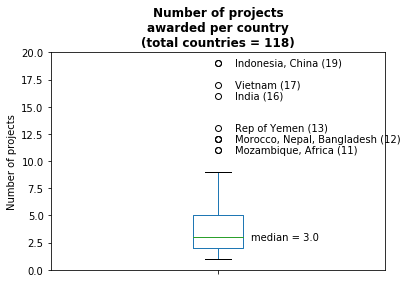

In [573]:
# Make boxplot to show that the top 10   
# countries are outliers compared to all countries

ax1 = json_df['countryshortname'].value_counts().plot(kind='box', ylim=[0,20])
ax1.annotate('Indonesia, China (19)', xy=(1.05, 18.75))
ax1.annotate('Vietnam (17)', xy=(1.05, 16.75))
ax1.annotate('India (16)', xy=(1.05, 15.75))
ax1.annotate('Rep of Yemen (13)', xy=(1.05, 12.75))
ax1.annotate('Morocco, Nepal, Bangladesh (12)', xy=(1.05, 11.75))
ax1.annotate('Mozambique, Africa (11)', xy=(1.05, 10.75))
ax1.annotate('median = 3.0', xy=(1.1, 2.75))
plt.title('Number of projects\nawarded per country\n(total countries = 118)', fontweight='bold')
plt.xticks([1], [''])
plt.ylabel('Number of projects')
plt.show()

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

##### a. Basic answer

In [574]:
# use normalization on the json string imported directly from the 
# json file. This creates a dataframe consisting only of code 
# numbers and names from the nested 'mjtheme_namecode' lists

theme_df = json_normalize(json_string,'mjtheme_namecode')
print('\n\n' + '\033[4m' + 'Sample of dataframe values (some names missing):' + '\033[0m')
print(theme_df.head(15))

print('\n\n' + '\033[4m' + 'Top 10 major project themes:' + '\033[0m')
print(theme_df['name'].value_counts().head(10))



Sample of dataframe values (some names missing):
   code                                          name
0     8                             Human development
1    11                                              
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6                                              
14    2                      Public sector governance


Top 10 major project themes:
Environment and natural resources management    223
Ru

##### b. Visualize the data

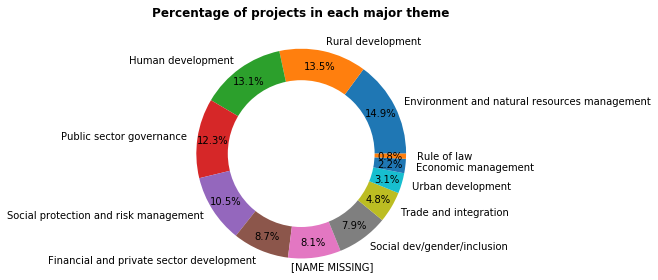

In [575]:
# plot the distribution of themes in the theme_df dataframe
ax1 = theme_df['name'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.85, )
ax1.annotate('[NAME MISSING]', xy=(-0.1, -1.1))
plt.ylabel('')
plt.title('Percentage of projects in each major theme\n', fontweight='bold')

# draw white circle to create donut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

##### a. Replace missing names in dataframe (does not result in any screen output)

In [576]:
# create an empty dictionary
code_dict = {}

# populate dictionary with code number and most common string associated
# with that number; use the theme_df table containing only code numbers
# and names from #2 above
for code in theme_df['code'].unique():
    code_dict[code] = theme_df['name'].loc[theme_df['code']==code].mode().iloc[0]

# loop through every row of dataframe and extract the mjtheme_namecode list
for mjtheme in json_df['mjtheme_namecode']:
    # loop through every dictionary in a single mjtheme_namecode list
    for indiv_dict in mjtheme:
        # replace missing names with name stored in code_dict
        if indiv_dict.get('name') == '':
            indiv_dict['name'] = code_dict.get(indiv_dict.get('code'))

##### b. Verify that the missing names have been filled in

In [577]:
# This is a clunky solution to the problem. The steps are:
# 1) Extract the mjtheme_namecode column from the full dataframe.
#    Each row contains a list of dictionaries; the 'name' value
#    we want to count is embedded in each dictionary
# 2) Convert the column data into a list of lists of dictionaries
#    (each row is a sublist in the larger list, each sublist 
#    contains one or more dictionaries)
# 3) 'Flatten' the list so that it is a list of dictionaries (instead
#     of a list of lists of dictionaries)
# 4) 'Normalize' the list to turn it into a dataframe with the same 
#    structure as the theme_df dataframe that was extracted directly
#    from the json string above (question #2a)
# 5) Print the 10 themes that occur most frequently, as in question #2a

# Step 1
mjtheme_namecode_asdf = json_df['mjtheme_namecode']

# Step 2
mjtheme_namecode_aslist = mjtheme_namecode_df.tolist()

# Step 3
flatten = lambda mjtheme_namecode_list: [subdict for sublist in mjtheme_namecode_list for subdict in sublist]
theme_list = flatten(mjtheme_namecode_list)

# Step 4
theme_df2 = json_normalize(theme_list)

# Step 5
print('\n\n' + '\033[4m' + 'Sample of dataframe values (missing names replaced):' + '\033[0m')
print(theme_df2.head(15))

print('\n\n' + '\033[4m' + 'Top 10 major project themes (after replacing missing names)' + '\033[0m')
print(theme_df2['name'].value_counts().head(10))



Sample of dataframe values (missing names replaced):
   code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6         Social protection and risk management
14    2                      Public sector governance


Top 10 major project themes (after replacing missing names)
Environment and nat

##### b. (Re)visualize the data

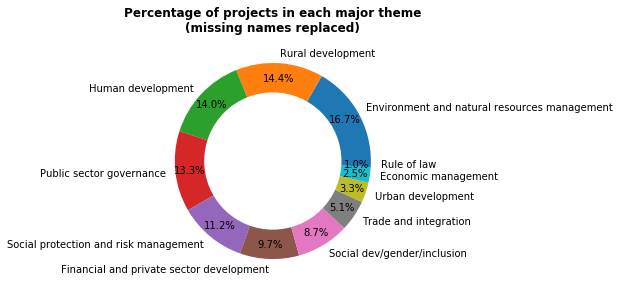

In [578]:
# plot the distribution of themes in the theme_df2 dataframe
ax1 = theme_df2['name'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.85, )
plt.ylabel('')
plt.title('Percentage of projects in each major theme\n(missing names replaced)\n', fontweight='bold')
# draw white circle to create donut plot
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()